## COGS 108: Cinema-Income Correlation in the United States

Group members:

Manuel Cortez (A13346837),

Qiyue Wang (A14647465),

Jose Salinda (A13210469),

Albert Peralta (A13420411),

Shannon Chu (A13956295)

# Introduction and Background

### Research Question
The aim of our project is finding trends in ratings and box office earnings of movies and movie genres and their relationship to the economic state of the United States. We want to know if there are correlations between a good or bad economic year and ratings for movies released as well as ratings for movie genres during that year.

### Overview
We chose to limit our study to the United States because we could access information from the United States Census Bureau such as median household income and GDP. 

We also found a dataset containing movie-data from 1984 to 2015 so that our study encompasses a variety of economic fluctuation such as the period of Reaganomics and the 2008 recession that will allow us to not only find a distinction between movies watched during outstanding economic times and economic struggles but also distinguish genres, revenue values, and ratings of movies.

### Hypothesis
When the economy is not doing well or when there is lower income per capita, we predict that box office/ratings for movies, in general, will be higher. In addition, when in years where incomes are relatively low compared to other years, moviegoers will gravitate toward specific genres of movies. On the other hand, when the economy is doing well, moviegoers will prefer other genres of movies.

### Background, Prior Work, and Review of Project Proposal
With every new movie, there is a flurry of data and reviews both good and bad, but rarely are the movies or their reviews juxtaposed with the overall economic status (and resulting sentiment) of the viewers after their release. In our study, we are looking to how ratings and box office incomes are influenced by outside factors.

Since 1984, the domestic economy in the United States has experienced many ups and downs. We want to know if people who watch movies in theaters when the economy is not doing well are looking for an escape from their daily lives. If people who watch movies when the economy is poor are looking for an escape, do they give movies better ratings than in other years? 

We also want to know if there is a correlation with box office values with median household incomes. We researched this by analyzing if box office values are negatively correlated with median household incomes.

In our initial proposal, we did not specify a specific set of genres we wanted to research whether or not movie watchers prefer specific genres of movies. Instead, we are relying on the dataset to find genres that have the highest correlation with good and bad economic years. This is to prevent our study from being affected by confirmation bias.

One study from Forbes analyzed how advertising affects revenue. Advertising for films involves a trade-off where too much spending on advertisements reaches a point of diminishing returns. There is a possibility that hard economic times by themselves are a kind of advertisement by tempting movie watchers to escape from the hardships of their daily lives. In this case, films would not need very large advertising budgets, which would increase box office revenues.

Source: https://www.forbes.com/sites/forbesinsights/2015/07/01/8-insights-on-how-marketing-drives-movie-box-office-sales/#156118c88ce3

Another study looks at many factors that affect a film's success such as competition, critical reception, awards, and franchise and actor favorability. The factors most relevant to our study are competition and critical reception. For example, the economy determines how many movies will be produced, which can lead to better movie reviews when there are fewer movies. On the opposite end of the spectrum, more movies means more competition, and movies that might have performed well with less competition are overshadowed. In addition, critical reception can either attract more movie watchers or severely reduce interest in spending money on a new film.

For example, take Disney's 2002 animation "Treasure Planet." The movie itself received great reviews but unfortunately flopped in the box office due to poor timing (the movie released right after "Lilo & Stitch"). Movie critic Jim Hill blamed the box office failure on consumers preferring to buy the film in DVD rather than spend money on both movie tickets and the DVD. "Treasure Planet" also failed in its advertising campaign. Its advertisements did not target a specific demographic and was very underfunded by executives who saw the film as a waste of time and money. However, critical reception has helped "Treasure Planet" to become a success after the box office; while box office revenues were very low, positive reviews and consumers looking to save on movie tickets paved the film's road to success in DVD sales.

Source: https://filmmarketing101.com/2018/11/23/what-factors-influence-a-films-box-office-success/

Source: https://topdocumentaryfilms.com/treasure-planet-disney-biggest-mistake/

Source: https://jimhillmedia.com/editor_in_chief1/b/jim_hill/archive/2003/01/07/227.aspx

***

# Dataset Descriptions

#### Dataset: GDP

Dataset Description: This dataset contains data about the United States' GDP from 1947 to 2015. There are 276 unique observations before cleaning because data about the United States' GDP was collected quarterly. The provided variables are the dates the data was collected and GDP in billions of dollars. The GDP values are not adjusted for inflation.

Link to dataset: https://query.data.world/s/gw6ftdnaltg55ldak7f5y45bj4hytx

#### Dataset: Household Median Income

Dataset Description: This excel file holds median household income in each of the 50 states in the United States with the addition of information from Washington D.C. from 1987 to 2017. The values are adjusted for both 2017 and 2018 USD.

Link to dataset: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

#### Dataset: Movie Database

Dataset Description: This csv file contains data for more than 5000 movies. Each film entry has 27 attributes including gross, budget, directors, and much more
    
Link to dataset: https://query.data.world/s/h4ksbq4lniukcgbvh25o5m2akczf3v

***

# Data Analysis - Cleaning & Pre-processing

In [3]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#import cpi library to adjust GDP for inflation
import sys
!python -m pip install cpi --user
import cpi as cpi

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [4]:
# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

## GDP

In [5]:
GDP_df = pd.read_excel('GDP-2.xls')

When we first look at GDP_df, we can see that there are many rows of cells containing NaN; those cells either contain notes or have been left blank by whoever created the dataset. Rows 0-8 contain a list of details about this dataset. Row 18 contains data column titles, and row 19 and onward contain dates formatted year-month-day and values in billions of US dollars. This dataset is a record of gross domestic product measured quarterly. See rows 0-8 in GDP_details_df below.

In [6]:
GDP_details_df = GDP_df.iloc[0:8,:]
GDP_details_df

,Title:,Gross Domestic Product
0,Series ID:,GDP
1,Source:,US. Bureau of Economic Analysis
2,Release:,Gross Domestic Product
3,Seasonal Adjustment:,Seasonally Adjusted Annual Rate
4,Frequency:,Quarterly
5,Units:,Billions of Dollars
6,Date Range:,1947-01-01 to 2016-01-01
7,Last Updated:,2016-05-27 7:56 AM CDT


Now isolated useful data, renumbered the indices, and added titles to the columns of data. We added titles to indicate the full date on which the data was collected and GDP in billions of US dollars.

In [7]:
GDP_df = GDP_df.iloc[19:295,:]
GDP_df.columns = ['DATE', 'GDP (in billions)']
GDP_df.index = range(276)

We also extracted the years from the 'DATE' column and placed the years in a new column 'YEARS', and then isolated only 'YEAR' and 'GDP' columns from GDP_df so we can sum quarterly measurements of GDP so we have annual measurements of GDP using groupby().

In [8]:
#extracting years from date column
GDP_df['YEAR'] = GDP_df['DATE'].dt.year
GDP_df = GDP_df[['DATE','YEAR','GDP (in billions)']]
#drop the 'DATE' column
GDP_df = GDP_df.drop('DATE',1)
#sum quarterly measurements of GDP so we get annual measurements of GDP
GDP_df = GDP_df.groupby(['YEAR']).sum()

Another major problem with GDP_df is that the GDP measurements have not been adjusted for inflation. We do so using the cpi library imported earlier.

In [9]:
#i = year
#GDP_df.at[i,'GDP'] is dollars

for i in GDP_df.index:    
    GDP_df.at[i,'GDP_adjusted (in billions)'] = cpi.inflate(GDP_df.at[i,'GDP (in billions)'], i, to = 2018)

In addition, due to restrictions of other datasets we are using, we are only interested in the years 1984 to 2015. We reduced GDP_df to match. We also exported a copy of GDP_df as a CSV file.

In [10]:
#trim GDP_df
GDP_df = GDP_df.loc[1984:2015,:]
#export GDP_df
cleaned_GDP_csv = GDP_df.to_csv (r'clean_GDP.csv')

#preview
GDP_df

,GDP (in billions),GDP_adjusted (in billions)
YEAR,,
1984,16162.8,39062.485270
1985,17387.0,40576.184099
1986,18360.5,42066.150306
1987,19480.9,43061.534827
1988,21010.5,44597.494704
...,...,...
2011,62071.7,69292.734350
2012,64621.0,70675.999578
2013,66652.6,71845.595660


## Median U.S. Household Income (1984-2017)

In [11]:
#Import csv
income = pd.read_csv('h08.csv')

In [12]:
#Get shape of initial dataset
income.shape

(114, 71)

In [13]:
#Preview the dataset
income

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,Table H-8. Median Household Income by State: ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,(Households as of March of the following year....,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,CURRENT DOLLARS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
3,State,2017,NaN,2016,NaN,...,NaN,1985 (20),NaN,1984 (19),NaN
4,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,...,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
...,...,...,...,...,...,...,...,...,...,...,...
109,West Virginia,"45,392","1,485","45,308","2,037",...,"1,938","34,821","1,804","37,955","1,370"
110,Wisconsin,"63,451","3,673","61,103","1,885",...,"1,719","50,645","2,529","46,743","1,850"
111,Wyoming,"57,837","3,134","59,073","3,189",...,"1,848","48,106","2,285","53,668","1,647"
112,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


Upon initial observation, we can see that there is clearly a large amount of data that we don't need but we can spot out the data that is useful to us when looking at the raw, unwrangled data. We can see that the relevant information starts at row 5 and we see that we can gather the household incomes at every odd column.

In [14]:
#Extract relevant data onto a dataframe
medianIncome = income.iloc[ :,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69] ][5:57]

Now that we have extracted the relevant data, we can begin to make our dataframe look presentable for easier interpretation. We begin by labeling all the extracted columns with their corresponding year.

In [16]:
#Starting at 2017, rename the columns with the year
for i in range(len(medianIncome.columns)):
    medianIncome.rename(columns = {medianIncome.columns[i]: 2017-i}, inplace=True)

In [17]:
#Preview re-named data
medianIncome

,2017,2016,2015,2014,2013,...,1987,1986,1985,1984,1983
5,"61,372","59,039","56,516","53,657","53,585",...,"27,225","26,061","24,897","23,618","22,415"
6,"51,113","47,221","44,509","42,278","47,320",...,"19,948","19,734","19,132","18,333","17,310"
7,"72,231","75,723","75,112","67,629","72,472",...,"33,103","33,233","31,356","34,782","32,356"
8,"61,125","57,100","52,248","49,254","52,611",...,"26,435","26,749","25,500","23,877","21,425"
9,"48,829","45,907","42,798","44,922","39,376",...,"20,172","18,827","18,730","17,451","15,674"
...,...,...,...,...,...,...,...,...,...,...,...
52,"71,293","66,451","61,486","66,155","65,907",...,"32,648","29,996","29,715","28,429","26,525"
53,"75,418","70,310","67,243","59,068","63,922",...,"32,327","27,319","26,881","24,000","25,017"
54,"45,392","44,354","42,824","39,552","43,069",...,"19,353","17,207","16,464","15,983","16,843"
55,"63,451","59,817","55,425","58,080","51,726",...,"29,575","26,369","26,430","23,246","20,743"


Wait a minute! There is a column with income from 1983, but we know that our range only goes back to 1984! Upon further observations, we can see that the original dataset has TWO columns for 2013.

In [18]:
income.iloc[3,:][11]

'2013 (38)'

In [19]:
income.iloc[3,:][9]

'2013 (39)'

We choose to drop the first '2013' based on trivial choice so as to not alter the median too significantly.

In [20]:
#Drop one 2013 column
medianIncome.drop(columns=2013,inplace=True)

In [21]:
#Rename the data again, this time with correct number of columns
for i in range(len(medianIncome.columns)):
    medianIncome.rename(columns = {medianIncome.columns[i]: 2017-i}, inplace=True)

Continue to clean up the dataframe by labeling each row with its respective state

In [22]:
#Extract state names from raw data into a dataframe
States = income[['Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61']].copy()
States = States[5:57]

In [23]:
#Rename the columns to a suitable name
States = States.rename(index=str, columns={"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61": "State", "Unnamed: 1":"2017 Median Household Income"} )

In [24]:
#Set the 'State' column as the index column
medianIncome = medianIncome.set_index(States.iloc[:,0])

Here we note that there are 52 rows even though we know that there are currently 50 states in the United States. Upon closer observation, we note that Washington D.C. and the overall United States have been given rows. Since we only want to look at states, we chose to drop D.C. and U.S. but keep the U.S. row as the average household median of each year. 

In [25]:
#Save US median to another dataframe
USMedian = medianIncome.loc[['United States']]

In [26]:
#Drop U.S. and D.C.
medianIncome.drop({'United States', 'D.C.'}, axis=0, inplace=True)

While getting a sense for the data, we saw that the numbers in our dataframes were actually string types and not integers because the data type was not specified when initially reading the csv. Since there were too many columns to specify which columns to parse as integer values, we convert the strings to ints in the following lines.

In [28]:
#The string-to-int converter does not like the ',' character in the values
#ex: 61,372
#Therefore we iterate through every cell removing the ',' character

for i in range(len(medianIncome.columns)):
    for x in range(len(medianIncome.index)):
        medianIncome.iloc[x,i] = medianIncome.iloc[x,i].replace(',','')

In [29]:
#Convert cell data from string to int
for i in range(len(medianIncome.columns)):
    for x in range(len(medianIncome.index)):
        medianIncome.iloc[x,i] = int(medianIncome.iloc[x,i],10)

Now do the same to our USMedian dataframe

In [30]:
#Perform same correction to USMedian dataframe
for i in range(len(USMedian.columns)):
    USMedian.iloc[0,i] = USMedian.iloc[0,i].replace(',','')

In [31]:
#Convert cell data from string to int
for i in range(len(USMedian.columns)):
    USMedian.iloc[0,i] = int(USMedian.iloc[0,i],10)

### Preparing GDP and Median Household Income Data for Merge

For the sake simplifying further use of this data, we decided to export the dataframes onto CSV files. But before doing that we need to strip away a bit of data to fit the years of our working range. To simplify a step further down the line, we also transpose the dataframes so that our YEARS are now the index values.

In [34]:
medianIncome = medianIncome.T
medianIncome = medianIncome.loc[2015:1984,:]
medianIncome = medianIncome.reindex(index=medianIncome.index[::-1])

In [35]:
USMedian = USMedian.T
USMedian = USMedian.loc[2015:1984]
USMedian = USMedian.reindex(index=USMedian.index[::-1])

In [36]:
cleaned_medianIncome_csv = medianIncome.to_csv (r'clean_medianIncome.csv', index = True, index_label = 'YEAR')

In [37]:
cleaned_USMedian_csv = USMedian.to_csv (r'clean_USMedian.csv', index = True, index_label = 'YEAR')

### Merge GDP and Median Household Income

In [38]:
USMedian_df = pd.read_csv('clean_USMedian.csv')
medianIncome_df = pd.read_csv('clean_medianIncome.csv')
GDP_df = pd.read_csv('clean_GDP.csv')

In [39]:
GDP_df = GDP_df.set_index('YEAR')

In [40]:
USMedian_df = USMedian_df.set_index('YEAR')

In [41]:
medianIncome_df = medianIncome_df.set_index('YEAR')

In [42]:
combined_df = GDP_df.merge(USMedian_df, how='outer', left_index=True, right_index=True)
combined_df = combined_df.merge(medianIncome_df, how='outer', left_index=True, right_index=True)

In [44]:
money_csv = combined_df.to_csv (r'money.csv')

In [43]:
#preview
combined_df

,GDP (in billions),GDP_adjusted (in billions),United States,Alabama,Alaska,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming
YEAR,,,,,,,,,,,
1984,16162.8,39062.485270,22415,17310,32356,...,26525,25017,16843,20743,23816
1985,17387.0,40576.184099,23618,18333,34782,...,28429,24000,15983,23246,22081
1986,18360.5,42066.150306,24897,19132,31356,...,29715,26881,16464,26430,23559
1987,19480.9,43061.534827,26061,19734,33233,...,29996,27319,17207,26369,27590
1988,21010.5,44597.494704,27225,19948,33103,...,32648,32327,19353,29575,26419
...,...,...,...,...,...,...,...,...,...,...,...
2011,62071.7,69292.734350,50054,42590,57431,...,62616,56850,41821,52058,54509
2012,64621.0,70675.999578,51017,43464,63648,...,64632,62187,43553,53079,57512
2013,66652.6,71845.595660,51939,41381,61137,...,67620,60106,40241,55258,55700


## IMDB (1916-2016)

In [294]:
mmdf = pd.read_csv('movie_metadata.csv')
mmdf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,...,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,...,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,...,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,...,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,...,NaN,12.0,7.1,NaN,0


When we looked at this dataset, we found that there are several variables that serve no purpose to our measurements. We deleted the columns (variables) we were not going to use to answer our research question.

In [295]:
mmdf = mmdf.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'language', 'budget','director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'movie_imdb_link', 'num_voted_users', 'num_critic_for_reviews', 'color','movie_facebook_likes','plot_keywords','aspect_ratio', 'num_user_for_reviews'], axis = 1)

As can be seen above, there is missing data in our data frame. Before deleting the empty rows, we checked our entire dataframe for missing data and decided that we can delete the rows with empty entries because it was not a lot and we will still be able to answer our question.

In [296]:
mmdf=mmdf.dropna(how = 'any')

When previewing each column, we found that genre, country, content_rating, and title_year needed some work. We started by cleaning out the content_rating column. This column has 18 different ratings; some of those ratings were less known of and only included a few amount of movies from our dataframe. We removed all rows from our dataframe that consisted of ratings we believe are not useful in our analysis. The content ratings that remained are: R, PG-13, PG, Not Rated, and G. 

In [297]:
mmdf = mmdf[mmdf.content_rating != 'TV-14']
mmdf = mmdf[mmdf.content_rating != 'TV-Y']
mmdf = mmdf[mmdf.content_rating != 'TV-Y7']
mmdf = mmdf[mmdf.content_rating != 'M']
mmdf = mmdf[mmdf.content_rating != 'GP']
mmdf = mmdf[mmdf.content_rating != 'NC-17']
mmdf = mmdf[mmdf.content_rating != 'Passed']
mmdf = mmdf[mmdf.content_rating != 'TV-PG']
mmdf = mmdf[mmdf.content_rating != 'TV-MA']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'TV-G']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'Unrated']
mmdf = mmdf[mmdf.content_rating != 'Approved']

Next, the title_year column. In our GDP and Median US Household income data set we had data starting from 1984 and ending in 2015. This imdb data set has data from years before and after theat range. We got rid of the movies released before 1984 and after 2015 so that this will enable us to make comparisons between the two data sets. In addition, the values in 'title_year' are floats and we changed them to be integers becuase all the values in title_year are whole numbers.

In [298]:
mmdf = mmdf[(mmdf.title_year >= 1984) & (mmdf.title_year < 2016)]
mmdf['title_year']=mmdf['title_year'].astype(int)

Our research question involves measuring how movies perform during changes in the United States economy. We noticed that our data set contains a lot of movies that were not released in the United States. We were worried if the gross values in our data set were in US dollars. We checked the source of our data set and found no information regarding this. We decided to remove all movies whose country column is not listed as 'USA' because those are movies whose gross value is in dollars. In the process of doing this, we lost a lot of movies that did air in the USA, but were not filmed in the USA. We thought that this will affect our ability to answer our research question, but still we have over 3000 observations.


In [299]:
mmdf=mmdf[mmdf.country =='USA']

We can now drop the country column since it already includes all the observations we are intersested.

In [300]:
mmdf=mmdf.drop(columns = ['country'])

To make the data easier to read for the reader, we decided to set 'movie_title' as our index. In addition, we thought that the order the columns were oringally set to be made it streneous to match movies with their respective measuremnents. 

In [301]:
mmdf.set_index('movie_title', inplace = True)
columnsTitles = [ 'genres','content_rating','title_year','duration', 'gross','imdb_score']
mmdf=mmdf[columnsTitles]
mmdf.head()

,genres,content_rating,title_year,duration,gross,imdb_score
movie_title,,,,,,
Avatar,Action|Adventure|Fantasy|Sci-Fi,PG-13,2009,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,PG-13,2007,169.0,309404152.0,7.1
The Dark Knight Rises,Action|Thriller,PG-13,2012,164.0,448130642.0,8.5
John Carter,Action|Adventure|Sci-Fi,PG-13,2012,132.0,73058679.0,6.6
Spider-Man 3,Action|Adventure|Romance,PG-13,2007,156.0,336530303.0,6.2


Since we will eventually be comparing the gross revenue of movies against other revenues, we calculate those values with inflation to account for the fact that not all movies were released in the same year.

In [310]:
#List containing all current 'gross' values
adjusted_gross = mmdf['gross'].tolist()

#Iterate list and adjust to 2018 value as it goes along
for i in range(len(adjusted_gross) - 1):
    adjusted_gross[i] = cpi.inflate(adjusted_gross[i], mmdf['title_year'][i], to = 2018)

In [311]:
#Insert column into Dataframe
mmdf.insert(5,"gross_adjusted",adjusted_gross, True)

In [486]:
#Copy before heavily modifying the dataframe
mmdf_copy = mmdf

Lastly, we had to do some data cleaning in our 'genres' column. We did not like that several genres were listed for several movies because they were not presented in a way in which we can explore our data for a specific genre. We found a function online that allowed us to split the data. This function, makes a new row for each genre for every movie. 

In [314]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df


mmdf= tidy_split(mmdf,'genres', sep='|')

mmdf.head()

,genres,content_rating,title_year,duration,gross,gross_adjusted,imdb_score
movie_title,,,,,,,
Avatar,Action,PG-13,2009,178.0,760505847.0,8.901418e+08,7.9
Avatar,Adventure,PG-13,2009,178.0,760505847.0,8.901418e+08,7.9
Avatar,Fantasy,PG-13,2009,178.0,760505847.0,8.901418e+08,7.9
Avatar,Sci-Fi,PG-13,2009,178.0,760505847.0,8.901418e+08,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007,169.0,309404152.0,3.747121e+08,7.1


Now our dataset shows more observation than what we really have. To fix this we created several data frames. For every genre category we had, we created a new data frame.

In [315]:
mmdf_drama=mmdf[mmdf['genres'].isin(['Drama'])]
mmdf_comedy=mmdf[mmdf['genres'].isin(['Comedy'])]
mmdf_thriller=mmdf[mmdf['genres'].isin(['Thriller'])]
mmdf_action=mmdf[mmdf['genres'].isin(['Action'])]
mmdf_romance=mmdf[mmdf['genres'].isin(['Romance'])]
mmdf_adventure=mmdf[mmdf['genres'].isin(['Adventure'])]
mmdf_crime=mmdf[mmdf['genres'].isin(['Crime'])]
mmdf_fantasy=mmdf[mmdf['genres'].isin(['Fantasy'])]
mmdf_scifi=mmdf[mmdf['genres'].isin(['Sci-Fi'])]
mmdf_family=mmdf[mmdf['genres'].isin(['Family'])]
mmdf_mystery=mmdf[mmdf['genres'].isin(['Mystery'])]
mmdf_horror=mmdf[mmdf['genres'].isin(['Horror'])]
mmdf_animation=mmdf[mmdf['genres'].isin(['Animation'])]
mmdf_biography=mmdf[mmdf['genres'].isin(['Biography'])]
mmdf_music=mmdf[mmdf['genres'].isin(['Music'])]
mmdf_sport=mmdf[mmdf['genres'].isin(['Sport'])]
mmdf_history=mmdf[mmdf['genres'].isin(['History'])]
mmdf_war=mmdf[mmdf['genres'].isin(['War'])]
mmdf_musical=mmdf[mmdf['genres'].isin(['Musical'])]
mmdf_documentary=mmdf[mmdf['genres'].isin(['Documentary'])]
mmdf_western=mmdf[mmdf['genres'].isin(['Western'])]
mmdf_news=mmdf[mmdf['genres'].isin(['News'])]


# Data Analysis - Visualization

## Visualization of GDP

We plotted GDP_df with years on the x-axis and adjusted GDP in billions on the y-axis to give us a better feel for the data. We can see a slight dip in GDP around 2008, which occurred due to the recession.

Text(0.5, 1.0, 'GDP from 1984 to 2015')

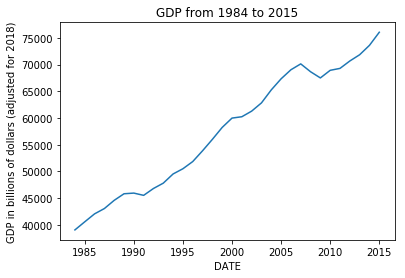

In [265]:
plt.plot(GDP_df['GDP_adjusted (in billions)'], '')
plt.xticks(rotation='horizontal')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (adjusted for 2018)')
plt.title('GDP from 1984 to 2015')

## Visualization of Median Household Income

The primary reason for plotting the median household income data is not necessarily to get a visual sense of the changes being conveyed but rather to confirm and add credibility to the GDP data which is what we intended to use as per our thesis.

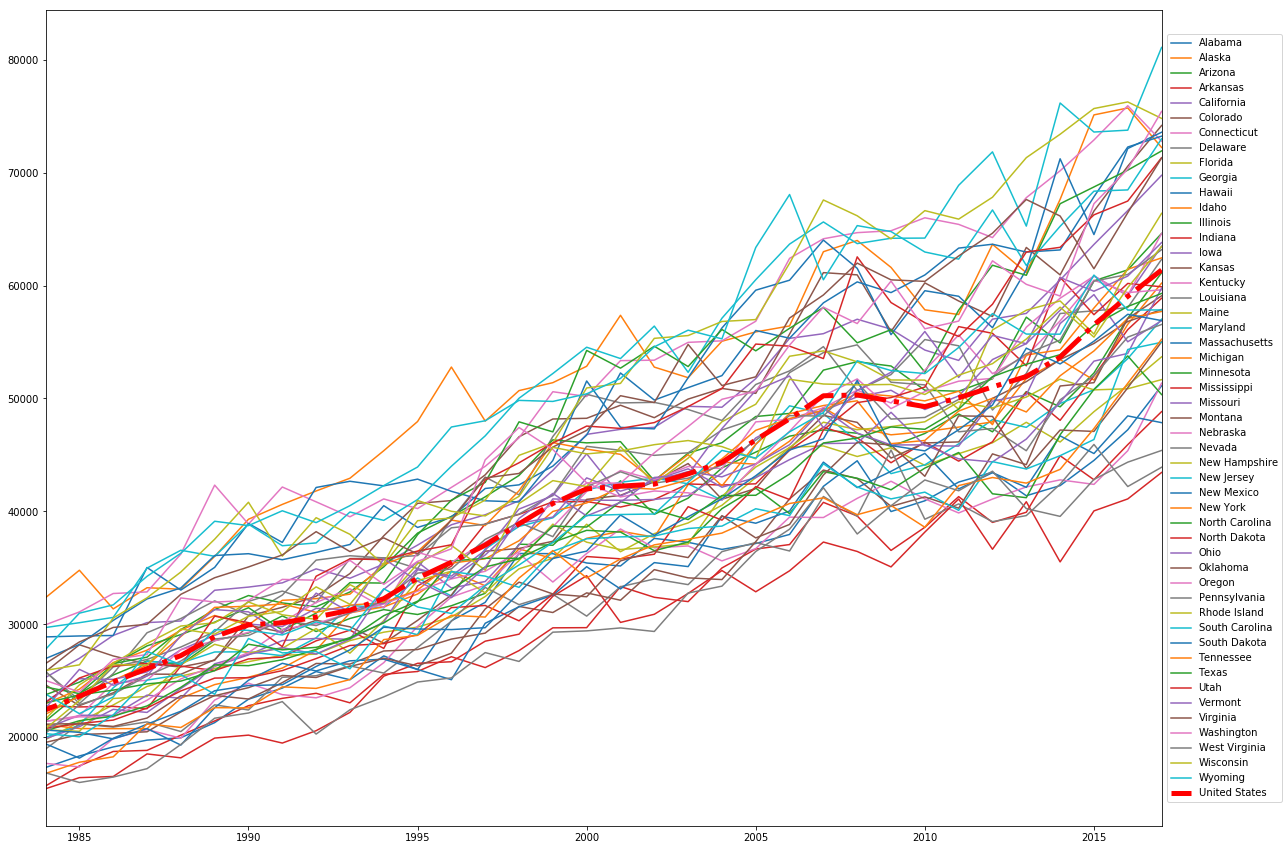

In [33]:
for i in range(len(medianIncome.index)):
    medianIncome.iloc[i,:].plot(figsize=(20,15), xlim=(1984,2017))

USMedian.iloc[0].plot(linewidth=5,c='red', linestyle='-.')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Visualization of Movie Dataset

The figure below gives the distribution of genres in our dataset. More specifically, this data set gives us the total number of movies that fall within each genre in our data set. Note: Because most movies in our dataset have two or more genres listed, the total number of generes listed exceed the number of movies in our dataset.

Text(0.5, 1.0, 'Total Number of Each Genre Category in Dataset ')

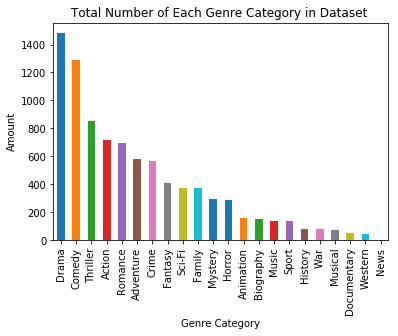

In [487]:
major_counts= mmdf['genres'].value_counts()
major_counts.plot.bar()
plt.xlabel('Genre Category')
plt.ylabel('Amount')
plt.title('Total Number of Each Genre Category in Dataset ')

The function 'describe' was used below to each data frame we created. This function ouputs a summary of the data frame being called. It ouputs the: count, average, standard deviation, minimumm value, maximum value, and quantiles. Without using visualizations, this function allows us to see the distribution of our data set. We will display only the fist output and would leave the rest for others to use. 

In [66]:
desc_drama = mmdf_drama.describe()
desc_comedy = mmdf_comedy.describe()
desc_thriller = mmdf_thriller.describe()
desc_action = mmdf_action.describe()
desc_romance = mmdf_romance.describe()
desc_adventure = mmdf_adventure.describe()
desc_crime = mmdf_crime.describe()
desc_fantasy = mmdf_fantasy.describe()
desc_scifi = mmdf_scifi.describe()
desc_family = mmdf_family.describe()
desc_mystery = mmdf_mystery.describe()
desc_horror = mmdf_horror.describe()
desc_animation = mmdf_animation.describe()
desc_biography = mmdf_biography.describe()
desc_music = mmdf_music.describe()
desc_sport = mmdf_sport.describe()
desc_history = mmdf_history.describe()
desc_war = mmdf_war.describe()
desc_musical = mmdf_musical.describe()
desc_documentary = mmdf_documentary.describe()
desc_western = mmdf_western.describe()
desc_news = mmdf_news.describe()
desc_drama



,title_year,duration,gross,imdb_score
count,1499.000000,1499.000000,1.499000e+03,1499.000000
mean,2004.140093,114.159440,4.073300e+07,6.665310
std,7.113076,22.230899,5.528111e+07,0.886283
min,1984.000000,73.000000,7.030000e+02,2.100000
25%,1999.000000,100.000000,5.566150e+06,6.100000
50%,2005.000000,110.000000,2.410359e+07,6.700000
75%,2010.000000,123.000000,5.291136e+07,7.300000
max,2016.000000,330.000000,6.586723e+08,9.300000


Being able to determine whether there are outliers can be a hard task to do with only a table. A scatter plot matrix allows us to visually see the distribution of our data. A scatter plot matrix ouputs a histogram for each each of our variables and shows a scatter plot between different combinations of each variable. I will call the function on every data frame we created for each genre and will only show the first output (drama). The rest will be available for users to see by uncommenting the function.

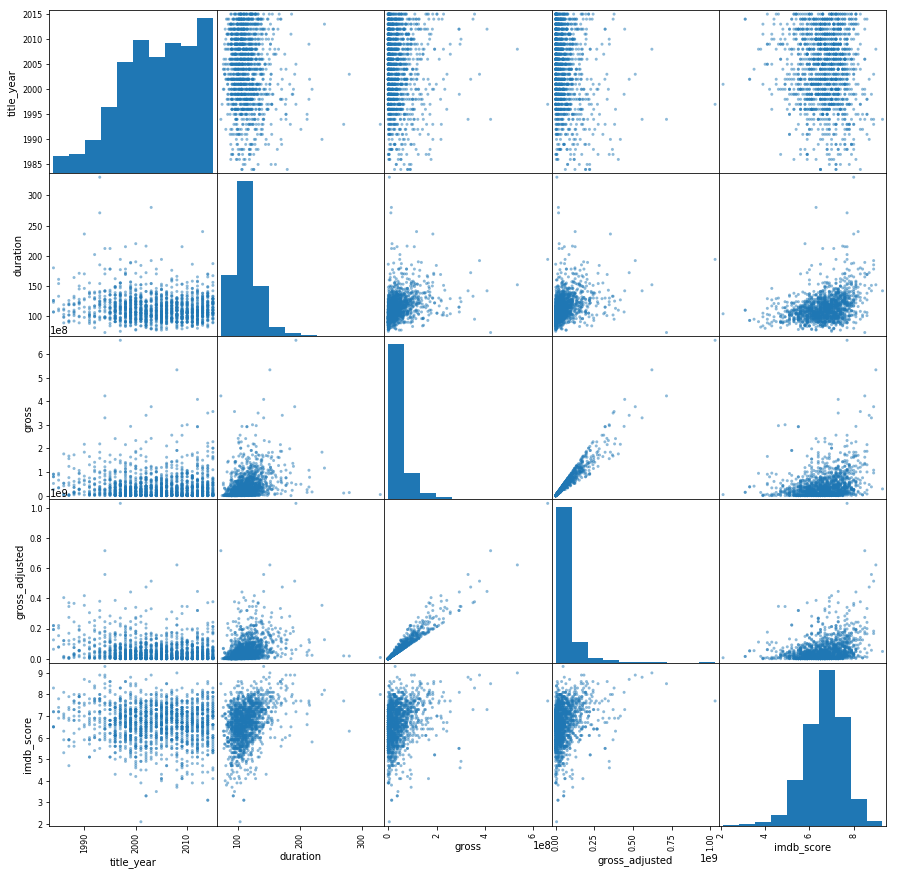

In [466]:
fig_drama=pd.plotting.scatter_matrix(mmdf_drama , figsize=[15,15])
#fig_comedy=pd.plotting.scatter_matrix(mmdf_comedy)
#fig_thriller=pd.plotting.scatter_matrix(mmdf_thriller)
#fig_action=pd.plotting.scatter_matrix(mmdf_action)
#fig_romance=pd.plotting.scatter_matrix(mmdf_romance)
#fig_adventure=pd.plotting.scatter_matrix(mmdf_adventure)
#fig_fantasy=pd.plotting.scatter_matrix(mmdf_fantasy)
#fig_mystery=pd.plotting.scatter_matrix(mmdf_mystery)
#fig_horror=pd.plotting.scatter_matrix(mmdf_horror)
#fig_animation=pd.plotting.scatter_matrix(mmdf_animation)
#fig_biography=pd.plotting.scatter_matrix(mmdf_biography)
#fig_music=pd.plotting.scatter_matrix(mmdf_music)
#fig_sport=pd.plotting.scatter_matrix(mmdf_sport)
#fig_history=pd.plotting.scatter_matrix(mmdf_history)
#fig_war=pd.plotting.scatter_matrix(mmdf_war)
#fig_musical=pd.plotting.scatter_matrix(mmdf_musical)
#fig_documentary=pd.plotting.scatter_matrix(mmdf_documentary)
#fig_western=pd.plotting.scatter_matrix(mmdf_western)
#fig_news=pd.plotting.scatter_matrix(mmdf_news)

# Data Analysis - Analysis & Results

### GDP vs Average IMDb score for the Given Year

Since we already have a measure of monetary value of the entire year, the most straight-forward way to see if there is a correlation between these two aspects is to get a score value for the entire year. We realize this may conflate the scores of "really good" movies and "really bad" movies, but our concern is to see if there is an overall connection between annual GDP and movie performance.

In [326]:
#Find every value for 'title_year'
years = np.sort(mmdf_copy['title_year'].unique())

#Create an empty dataframe out of the 'title_year' values
years_df = pd.DataFrame(index = years)
years_df['Avg Score'] = ''

In [327]:
#Fill in the dataframe with an average score for movies on the given year
for i in range(len(years_df.index)):
    years_df.iloc[i,0] = np.mean(mmdf_copy.loc[mmdf_copy['title_year'] == years_df.index[i]]['imdb_score'].values)

In [328]:
years_df.head()

,Avg Score
1984,6.75625
1985,6.87273
1986,6.46842
1987,6.22174
1988,6.60357


Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

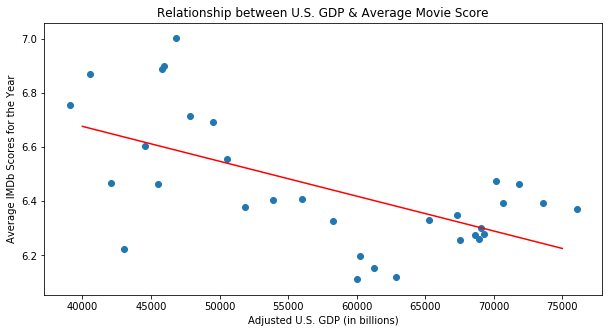

In [470]:
#Plot relation
plt.figure(figsize=(10, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_df['Avg Score'])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_df['Avg Score'].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Movie Score')
ax.set_ylabel('Average IMDb Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

### GDP vs Average Movie Gross for the Given Year

Simply based on the plot above, we can declare that we have an answer to our hypothesis question. However, the plot above used the average movies scores to rate their performance. The following plot will attempt to find correlations between GDP and movie performance but instead use movie gross as the rating of popularity.

In [329]:
years_df.insert(1,'Avg Adjusted Gross','',True)

In [345]:
#Fill in the dataframe with an average score for movies on the given year
for i in range(len(years_df.index)):
    years_df.iloc[i,1] = np.mean(mmdf_copy.loc[mmdf_copy['title_year'] == years_df.index[i]]['gross_adjusted'].values)

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

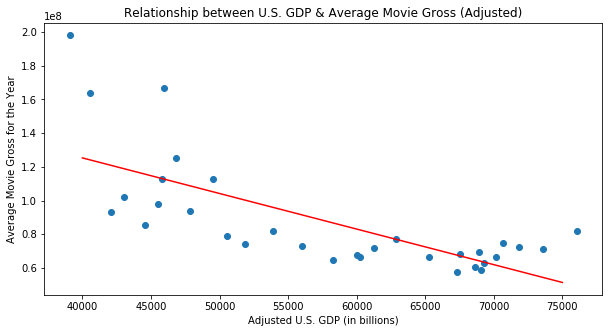

In [399]:
#Plot relation
plt.figure(figsize=(10, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_df['Avg Adjusted Gross'])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_df['Avg Adjusted Gross'].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Movie Gross (Adjusted)')
ax.set_ylabel('Average Movie Gross for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

### GDP vs Average IMDb Score for a Given Year (by genre)

Given that we, again, see a negative line of regression, we set out to see if we can find any different correlations between U.S. GDP and average movie ratings but this time with the added variable of specific movie genres.

To do so, we find the average movie scores of each genre of each year.

In [406]:
#Find every value for 'title_year'
years_genre = np.sort(mmdf['title_year'].unique())


#Create an empty dataframe out of the 'title_year' values
years_genre_df = pd.DataFrame(index = years, columns = mmdf['genres'].unique())

In [471]:
#Find the average IMDb score for movies of a particular genre during a particular year

for i in range(len(years_genre_df.index)):
    for x in range(len(years_genre_df.columns)):
        if mmdf[(mmdf['title_year'] == years_genre_df.index[i]) & (mmdf['genres'] == years_genre_df.columns[x])].size > 0:
            years_genre_df.iloc[i,x] = np.mean(mmdf[(mmdf['title_year'] == years_genre_df.index[i]) & (mmdf['genres'] == years_genre_df.columns[x])]['imdb_score'].values)
            
#Fill missing data with 0            
years_genre_df.fillna(0)

,Action,Adventure,Fantasy,Sci-Fi,Thriller,...,War,Biography,Music,Documentary,News
1984,6.787500,6.650000,6.400000,6.400000,5.950000,...,0.000000,8.300000,6.950000,0.000000,0.0
1985,6.833333,7.233333,6.100000,8.500000,6.325000,...,6.400000,7.200000,6.900000,0.000000,0.0
1986,6.500000,6.700000,6.200000,6.433333,5.900000,...,0.000000,0.000000,0.000000,0.000000,0.0
1987,5.885714,5.400000,5.860000,7.166667,5.820000,...,7.300000,7.050000,5.500000,0.000000,0.0
1988,6.685714,6.500000,6.742857,6.333333,6.372727,...,5.700000,6.800000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2011,6.238889,6.425806,5.835294,6.328571,6.269444,...,5.800000,7.040000,4.975000,5.920000,0.0
2012,6.373684,6.740000,6.526923,6.647368,6.361905,...,6.600000,7.042857,6.116667,6.725000,0.0
2013,6.497143,6.596970,6.416000,6.705000,6.438095,...,7.600000,7.570000,6.277778,6.066667,0.0
2014,6.378049,6.712121,5.863158,6.838095,6.164706,...,6.842857,6.800000,7.042857,0.000000,0.0


***Note: In the cell above, we filled the missing data with 0. This evidently skews some data, but the overall message is still clear.***

***Also, if plot does not have a line of regression then it means there wasn't enough data for the model. We could have fixed this by having the model ignore the empty cells, but the resulting lines were not good representations of the data so chose to leave the plots as they are.***

#### Drama

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

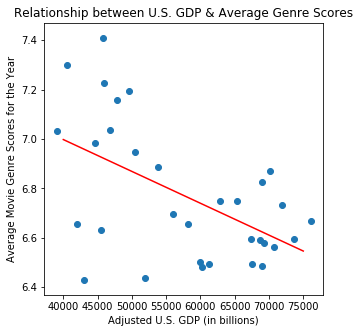

In [443]:
genre = 'Drama'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].fillna(0).tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Comedy

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

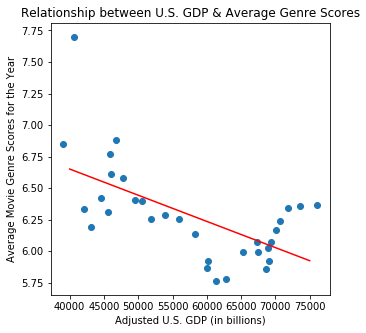

In [435]:
genre = 'Comedy'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Thriller

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

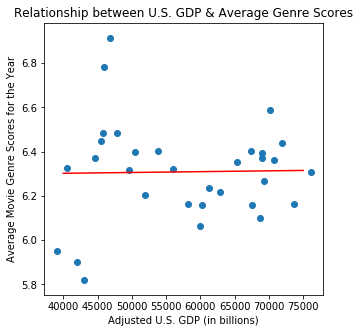

In [436]:
genre = 'Thriller'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Action

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

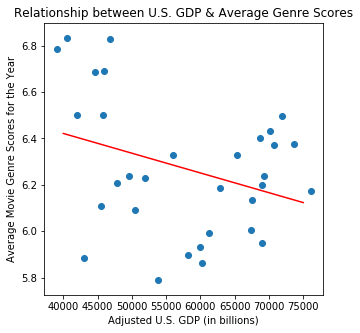

In [437]:
genre = 'Action'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Romance

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

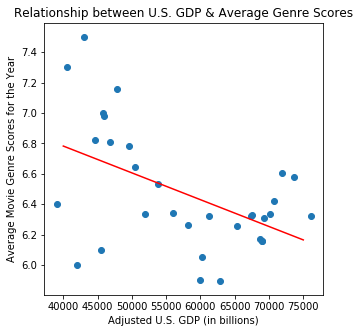

In [438]:
genre = 'Romance'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Adventure

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

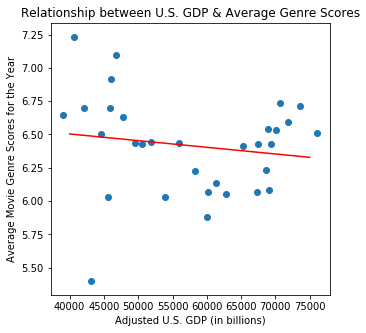

In [415]:
genre = 'Adventure'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Crime

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

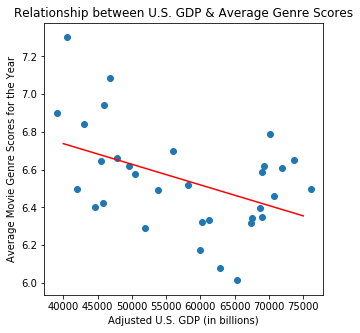

In [416]:
genre = 'Crime'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Fantasy

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

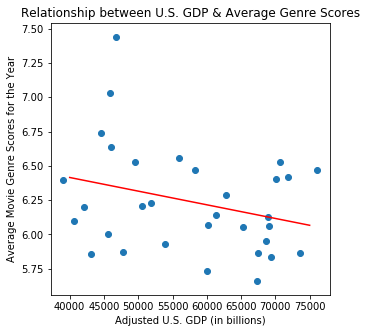

In [417]:
genre = 'Fantasy'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Sci-Fi

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

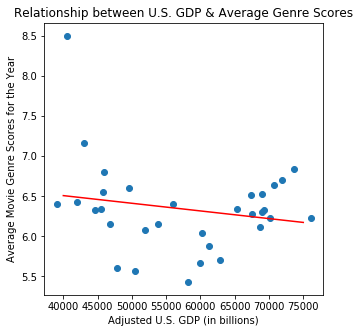

In [418]:
genre = 'Sci-Fi'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Family

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

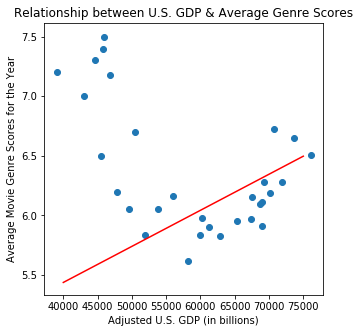

In [445]:
genre = 'Family'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].fillna(0).tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Mystery

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

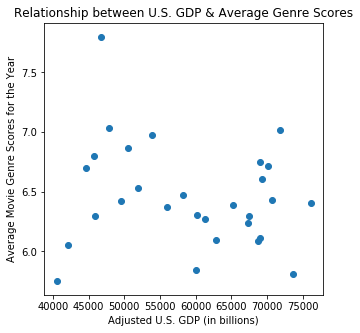

In [449]:
genre = 'Mystery'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Horror

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

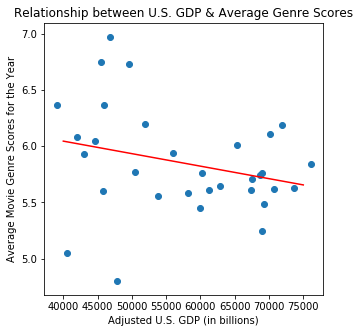

In [422]:
genre = 'Horror'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Animation

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

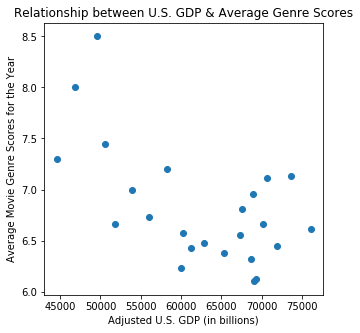

In [451]:
genre = 'Animation'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Biography

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

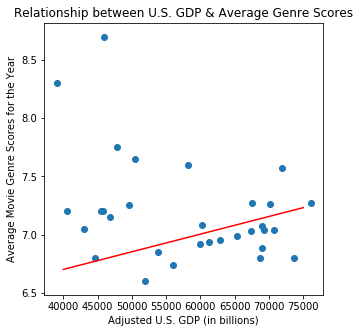

In [452]:
genre = 'Biography'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].fillna(0).tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Music

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

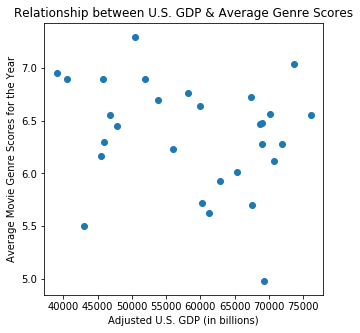

In [454]:
genre = 'Music'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Sport

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

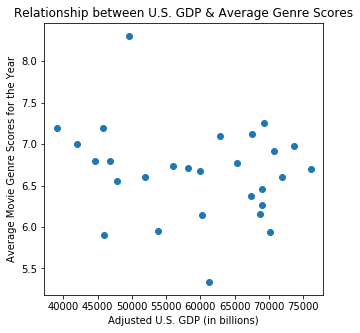

In [456]:
genre = 'Sport'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### History

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

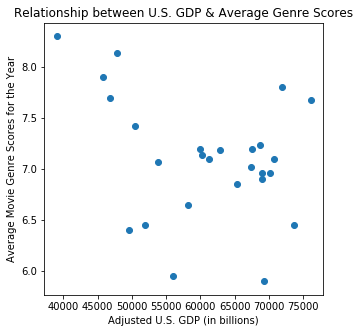

In [458]:
genre = 'History'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### War

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

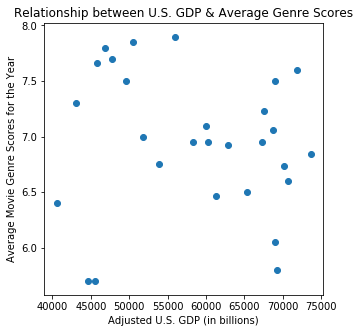

In [428]:
genre = 'War'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Musical

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

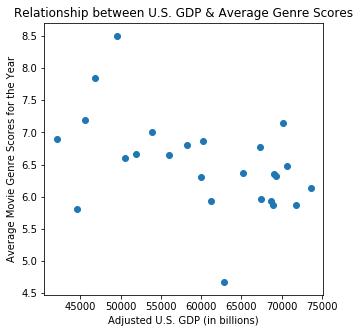

In [460]:
genre = 'Musical'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Documentary

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

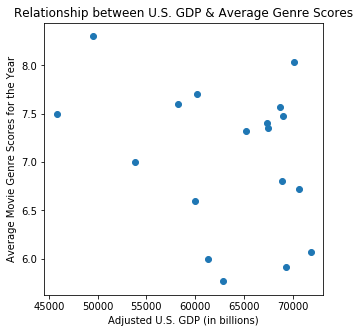

In [430]:
genre = 'Documentary'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### Western

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

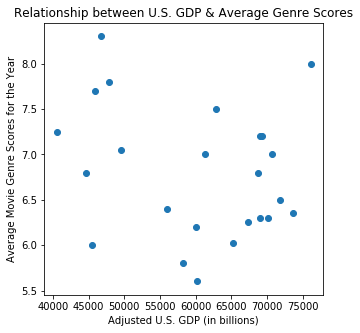

In [431]:
genre = 'Western'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

#### News

Text(0.5, 0, 'Adjusted U.S. GDP (in billions)')

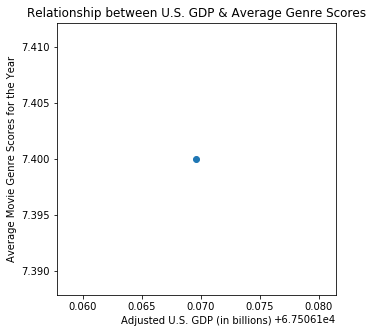

In [462]:
genre = 'News'

#Plot relation
plt.figure(figsize=(5, 5), dpi=72)
plt.scatter(combined_df['GDP_adjusted (in billions)'], years_genre_df[genre])

#1-degree linear model from polyfit
a1, b1 = np.polyfit(combined_df['GDP_adjusted (in billions)'].tolist(), years_genre_df[genre].tolist(), 1)

#Plot red linear regression line
x = np.arange(40000, 75000)
plt.plot(x, a1 * x + b1, '-', color='red') 


#Titles and axes
ax = plt.gca()
ax.set_title('Relationship between U.S. GDP & Average Genre Scores')
ax.set_ylabel('Average Movie Genre Scores for the Year')
ax.set_xlabel('Adjusted U.S. GDP (in billions)')

***

# Ethical Considerations, Privacy, and Other Key Points

Data Collection  
The data being collected involves the income of individuals in America as well as public information about films’ performance in the public eye. There is no abuse of consent regarding the income data collected was via a survey of the US Census Bureau. Given that the information was collected via surveying, the data may have biases based on voluntary input and location which we hope to dispel by choosing a wide yet focused group of individuals with which we hope to answer our question.

Data Storage  
Most of the data we gathered so far all come from the site called Kaggle, which is built for people to do their data science projects. It fits our purpose perfectly. The movie dataset we found has information about 1000 movies. Most of the movies are from the year 2014 and after,  but from the year 2007 and later, each year has data of at least 51 movies, which we think is enough for our analysis. Our household income data all come directly or indirectly from the US Census Bureau, and they cover the year range of the movie data we get. The data we will use throughout the development of this project has been publicly collected data so we are not concerned with security issues such as disclosing private information nor are we planning to obscure any data after reaching our conclusions.

Analysis  
As already mentioned, the census data we have found may introduce bias into our exploratory analysis. We hope to avoid reaching incomplete conclusions by sampling from varied information (ex: different locations, income, ethnicities, etc ) from the large dataset.
Luckily, the current datasets that we have found appear to have no missing data so that shouldn’t manifest any misrepresentation issues. However, if we find datasets with missing data then we will undoubtedly clean up the dataset and scrape off the properties with missing values so as to have a (mostly) complete set to work with.
Using these strategies, we hope to produce a complete and honest answer to our question(s).

Other Key Points   
     # Is it a well-posed question?    
It is generally a well-posed question because we are looking at data over time. If we are only comparing data from one year, the taste in movies from households with different income might differ only because of their economic status in society. Comparing income change overtime let us focus on the overall economic situation of the US and how it affects people’s preference for movies.

     # Could the information you will gain and/or the tools you are building be co-opted for nefarious purposes?  
The nature of our question does not immediately invite the possibility of misuse of our data and our potential conclusions. In the case that we find a positive correlation between income and film ratings, the only real “nefarious” use of our conclusion(s) would be to use the findings to plan a successful film release which - as far as we know - is very unlikely in our group


# Conclusion and Discussion

Our IMDb, GDP, and median household income datasets were all cleaned so that we could observe certain characteristics per dataset. Cleaning the datasets allowed us to visualize patterns occurring within and between our movie, income, and GDP data. Upon visualizing the data, we plotted the median household income data against the GDP data to confirm that the two datasets display a similar overall trend, allowing the GDP dataset to be backed up by the median household income dataset.

Upon correlational analysis, we plotted the average IMDb score a movie received against the GDP value of the U.S. during the year that movie released. Additionally, we also plotted the gross amount of a movie’s earnings (as a whole and by specific genres) against the GDP of that same year. **Both of these correlation tests yielded negative correlations, where the increase in GDP was followed by a decrease in movie rating and gross earnings.** At first glance, these results convey the idea that movies receive lower ratings and earnings as the U.S. GDP increases. When plotting movies by their genres, this same negative effect was observed through most movies where only a few movie genres like “Thriller” and “Biography” experienced positive correlations. Some movie genres, however, did not experience any correlation results which can be attributed to the lack of movie data in that genre inhibiting us from making any accurate models from that data.

An explanation for these results may lie in the data of the IMDb set. Because IMDb was released in 1990 and may have taken some time to gain traction, the information we received may be positively biased towards older movies. In order to rate these movies, critics had to go back and rate these movies and we believe that it is very possible that those critics only chose movies they believed were worth watching as opposed to the entire year’s movie catalog. As a result, the early “classical” movies may have fewer but more positive ratings versus the newer movies which carry a plethora of reviews and scores. 

Limitations towards the data include a lack of data points after the cleaning which is seen especially in the genre correlation tests. Furthermore, the data we used excluded movies whose country label was not “U.S.” where movies could have been initially released in other countries and screened in the U.S. later on. This can attribute to the lack of data that we experienced. Finally, we perceive choosing to use gross earnings as a limitation because it may not be the most accurate representation of a movie’s success. Likewise, choosing to use GDP as the country’s quantitative representation for economic status may not have been the most accurate attribute to use.

Further studies on the topic could involve broadening the scope from being exclusive to the United States so as to account for a more international measure of economic status and film success. Additionally, the datasets could also be improved upon so as to avoid the issues of lacking and seemingly-biased data.
